# Polynomial Regression vs Linear Regression

## Import libraries and dataset

In [205]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset = pd.read_csv('model.csv')
X_year = dataset.iloc[:, 1:2].values
X_km = dataset.iloc[:, 4:5].values
y = dataset.iloc[:, -1].values







## Splitting up the dataset for training

In [206]:
from sklearn.model_selection import train_test_split

X_year_train, X_year_test, y_year_train, y_year_test = train_test_split(X_year, y, test_size = 0.2, random_state = 0)
X_km_train, X_km_test, y_km_train, y_km_test = train_test_split(X_km, y, test_size = 0.2, random_state = 0)

## Training the Linear Regression model

In [207]:
from sklearn.linear_model import LinearRegression

lin_reg_year = LinearRegression()
lin_reg_km = LinearRegression()
lin_reg_year.fit(X_year_train, y_year_train)
lin_reg_km.fit(X_km_train, y_km_train)

LinearRegression()

## Training the Polynomial Regression model

In [208]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree= 3)

X_year_poly = poly_reg.fit_transform(X_year_train)
X_km_poly = poly_reg.fit_transform(X_km_train)

lin_reg_year_2 = LinearRegression()
lin_reg_year_2.fit(X_year_poly, y_year_train)

lin_reg_km_2 = LinearRegression()
lin_reg_km_2.fit(X_km_poly, y_km_train)

LinearRegression()

## Visualising the Linear Regression results Year

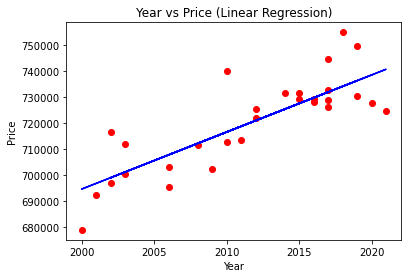

In [209]:
plt.scatter(X_year, y, color = 'red')
plt.plot(X_year, lin_reg_year.predict(X_year), color = 'blue')
plt.title('Year vs Price (Linear Regression)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

## Visualising the Linear Regression results km

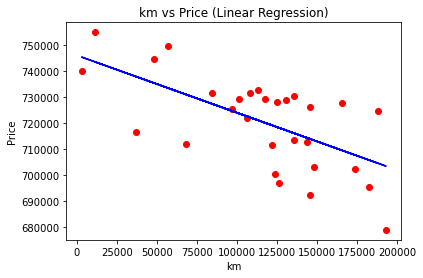

In [210]:
plt.scatter(X_km, y, color = 'red')
plt.plot(X_km, lin_reg_km.predict(X_km), color = 'blue')
plt.title('km vs Price (Linear Regression)')
plt.xlabel('km')
plt.ylabel('Price')
plt.show()

## Visualising the Polynomial Regression results year

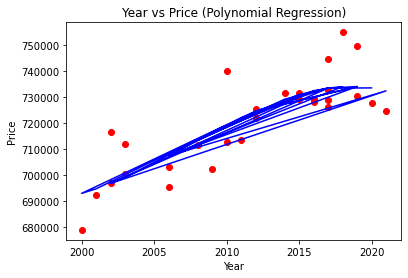

In [211]:
plt.scatter(X_year, y, color = 'red')
plt.plot(X_year, lin_reg_year_2.predict(poly_reg.fit_transform(X_year)), color = 'blue')
plt.title('Year vs Price (Polynomial Regression)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

## Visualising the Polynomial Regression results km

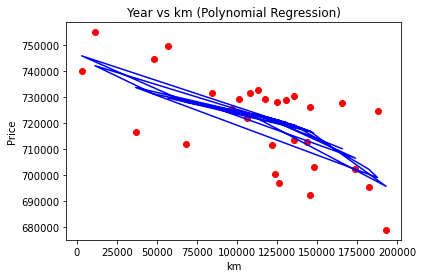

In [212]:
plt.scatter(X_km, y, color = 'red')
plt.plot(X_km, lin_reg_km_2.predict(poly_reg.fit_transform(X_km)), color = 'blue')
plt.title('Year vs km (Polynomial Regression)')
plt.xlabel('km')
plt.ylabel('Price')
plt.show()

## Predicting test result with Linear Regression

In [213]:
predict_year = lin_reg_year.predict(X_year_test)

predict_km = lin_reg_km.predict(X_km_test)

np.set_printoptions(precision=2)

display(lin_reg_year.score(X_year_test, y_year_test))
display(np.concatenate((predict_year.reshape(len(predict_year), 1),y_year_test.reshape(len(y_year_test), 1) ), 1))
display(lin_reg_km.score(X_km_test, y_km_test))
display(np.concatenate((predict_km.reshape(len(predict_km), 1),y_km_test.reshape(len(y_km_test), 1) ), 1))

0.8232901983021739

array([[701224.49, 700584.33],
       [731842.32, 744509.1 ],
       [718720.39, 713545.74],
       [729655.33, 729209.08],
       [725281.36, 731581.07],
       [712159.43, 711544.63]])

0.552414354957766

array([[718679.57, 700584.33],
       [735372.24, 744509.1 ],
       [716152.01, 713545.74],
       [720048.33, 729209.08],
       [727315.12, 731581.07],
       [719121.46, 711544.63]])

## Predicting a new result with Polynomial Regression

In [214]:
predict_year = lin_reg_year_2.predict(poly_reg.fit_transform(X_year_test))
predict_km = lin_reg_km_2.predict(poly_reg.fit_transform(X_km_test))

np.set_printoptions(precision=2)

display(lin_reg_year_2.score(poly_reg.fit_transform(X_year_test), y_year_test))
display(np.concatenate((predict_year.reshape(len(predict_year), 1),y_year_test.reshape(len(y_year_test), 1) ), 1))
display(lin_reg_km_2.score(poly_reg.fit_transform(X_km_test), y_km_test))
display(np.concatenate((predict_km.reshape(len(predict_km), 1),y_km_test.reshape(len(y_km_test), 1) ), 1))

0.8321654521044823

array([[699196.08, 700584.33],
       [733360.6 , 744509.1 ],
       [721974.18, 713545.74],
       [732336.72, 729209.08],
       [729092.25, 731581.07],
       [713339.14, 711544.63]])

0.3601900648812778

array([[721416.27, 700584.33],
       [731152.96, 744509.1 ],
       [719264.95, 713545.74],
       [722373.71, 729209.08],
       [726156.55, 731581.07],
       [721739.33, 711544.63]])